In [1]:
# #########################################################################
# program to perform some supplemental analysis of the alphabet and pixels
# note: has not been put into base 9X9 code yet
#       notebook created for initial distribution
# #########################################################################

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 88em;} </style>"))

# set cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
pd.options.display.max_columns = 150

In [3]:
# copy your 'trainingDataList' from your program if different from below

trainingDataList = [     ( 1,[0,0,0,0,1,0,0,0,0, 0,0,0,1,0,1,0,0,0, 0,0,1,0,0,0,1,0,0, 0,1,0,0,0,0,0,1,0, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1],1,'A',0,'A'), # training data list 1 selected for the letter 'A'
                         ( 2,[1,1,1,1,1,1,1,1,0, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,1,0, 1,1,1,1,1,1,1,0,0, 1,0,0,0,0,0,0,1,0, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,0],2,'B',1,'B'), # training data list 2, letter 'E', courtesy AJM
                         ( 3,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1],3,'C',2,'C'), # training data list 3, letter 'C', courtesy PKVR
                         ( 4,[1,1,1,1,1,1,1,1,0, 1,0,0,0,0,0,0,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,1,1, 1,1,1,1,1,1,1,1,0],4,'D',2,'C'), # training data list 4, letter 'D', courtesy TD
                         ( 5,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1],5,'E',1,'B'), # training data list 5, letter 'E', courtesy BMcD 
                         ( 6,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0],6,'F',1,'B'), # training data list 6, letter 'F', courtesy SK
                         ( 7,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1],7,'G',2,'C'),
                         ( 8,[1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1],8,'H',3,'H'), # training data list 8, letter 'H', courtesy JC
                         ( 9,[0,0,1,1,1,1,1,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,1,1,1,1,1,0,0],9,'I',4,'I'), # training data list 9, letter 'I', courtesy GR
                         (10,[0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0,1,0, 0,1,0,0,0,0,0,1,0, 0,1,0,0,0,0,0,1,0, 0,0,1,0,0,0,1,0,0, 0,0,0,1,1,1,0,0,0],10,'J',5,'J'), # training data list 10 selected for the letter 'L', courtesy JT
                         (11,[1,0,0,0,0,0,1,0,0, 1,0,0,0,0,1,0,0,0, 1,0,0,0,1,0,0,0,0, 1,0,0,1,0,0,0,0,0, 1,1,1,0,0,0,0,0,0, 1,0,0,1,0,0,0,0,0, 1,0,0,0,1,0,0,0,0, 1,0,0,0,0,1,0,0,0, 1,0,0,0,0,0,1,0,0],11,'K',1,'B'), # training data list 11 selected for the letter 'K', courtesy EO      
                         (12,[1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1],12,'L',2,'C'), # training data list 12 selected for the letter 'L', courtesy PV
                         (13,[1,0,0,0,0,0,0,0,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,0,1,0,0,0,1,0,1, 1,0,1,0,0,0,1,0,1, 1,0,0,1,0,1,0,0,1, 1,0,0,1,0,1,0,0,1, 1,0,0,0,1,0,0,0,1, 1,0,0,0,1,0,0,0,1],13,'M',6,'M'), # training data list 13 selected for the letter 'M', courtesy GR            
                         (14,[1,0,0,0,0,0,0,0,1, 1,1,0,0,0,0,0,0,1, 1,0,1,0,0,0,0,0,1, 1,0,0,1,0,0,0,0,1, 1,0,0,0,1,0,0,0,1, 1,0,0,0,0,1,0,0,1, 1,0,0,0,0,0,1,0,1, 1,0,0,0,0,0,0,1,1, 1,0,0,0,0,0,0,0,1],14,'N',6,'M'), # training data list 14 selected for the letter 'N'
                         (15,[0,1,1,1,1,1,1,1,0, 1,1,0,0,0,0,0,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 0,1,1,1,1,1,1,1,0],15,'O',2,'C'), # training data list 15, letter 'O', courtesy TD
                         (16,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0],16,'P',1,'B'), # training data list 16, letter 'P', courtesy MT
                         (17,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,1,0,0,1, 1,0,0,0,0,0,1,0,1, 1,0,0,0,0,0,0,1,1, 1,1,1,1,1,1,1,1,1],17,'Q',2,'C'), # training data list 17, letter 'Q', courtesy AJM (square corners)
                         (18,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,1,0,0,0, 1,0,0,0,0,0,1,0,0, 1,0,0,0,0,0,0,1,0, 1,0,0,0,0,0,0,0,1],18,'R',1,'B'), # training data list 18, letter 'R', courtesy AJM (variant on 'P') 
                         (19,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,0,1, 0,0,0,0,0,0,0,0,1, 0,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1],19,'S',2,'C'), # training data list 19, letter 'S', courtesy RG (square corners)
                         (20,[0,1,1,1,1,1,1,1,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0],20,'T',4,'I'), # training data list 20, letter 'T', courtesy JR
                         (21,[1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 0,1,1,0,0,0,1,1,0, 0,0,1,1,1,1,1,0,0],21,'U',7,'U'), # training data list 21, letter 'U', courtesy JD
                         (22,[1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 0,1,0,0,0,0,0,1,0, 0,1,0,0,0,0,0,1,0, 0,0,1,0,0,0,1,0,0, 0,0,1,0,0,0,1,0,0, 0,0,0,1,0,1,0,0,0, 0,0,0,1,0,1,0,0,0, 0,0,0,0,1,0,0,0,0],22,'V',6,'M'), # training data list 22, letter 'V', courtesy JD
                         (23,[1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,1,0,0,0,1, 1,0,0,1,0,1,0,0,1, 1,0,1,0,0,0,1,0,1, 0,1,0,0,0,0,0,1,0],23,'W',6,'M'), # training data list 23, letter 'W', courtesy KW
                         (24,[1,0,0,0,0,0,0,0,1, 0,1,0,0,0,0,0,1,0, 0,0,1,0,0,0,1,0,0, 0,0,0,1,0,1,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,1,0,1,0,0,0, 0,0,1,0,0,0,1,0,0, 0,1,0,0,0,0,0,1,0, 1,0,0,0,0,0,0,0,1],24,'X',6,'M'), # training data list 24, letter 'X', courtesy JD
                         (25,[1,0,0,0,0,0,0,0,1, 0,1,0,0,0,0,0,1,0, 0,0,1,0,0,0,1,0,0, 0,0,0,1,0,1,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0],25,'Y',6,'M'),
                         (26,[1,1,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,1,0,0, 0,0,0,0,0,1,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,1,0,0,0,0,0, 0,0,1,0,0,0,0,0,0, 0,1,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1],26,'Z',6,'M') # training data list 26, letter 'Z', courtesy ZW
                   ]
print(trainingDataList)

[(1, [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1], 1, 'A', 0, 'A'), (2, [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], 2, 'B', 1, 'B'), (3, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], 3, 'C', 2, 'C'), (4, [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0

In [4]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# counter for pixels across all letters
counter = np.zeros(81)

# sum up the pixels across all letters
for indxR in range(len(trainingDataList)):
    for indxC in range(len(trainingDataList[indxR][1])):
        counter[indxC] = counter[indxC] + trainingDataList[indxR][1][indxC]

# print total for letters
fig = plt.figure()
fig.set_size_inches(10,0.1)
ax = plt.Axes(fig, [1,1,1,1])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(np.array(counter, dtype='float').reshape((1,81)), cmap='YlGn')
annotate('ALL',xy=(0,0),xytext=(-4,.5),fontsize=10)
plt.show()
 
# now print individual letters    
for trainingIndx in range(len(trainingDataList)):
    fig = plt.figure()
    fig.set_size_inches(10,.1)
    ax = plt.Axes(fig, [1,1,1,1])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.imshow(np.array(trainingDataList[trainingIndx][1], dtype='float').reshape((1,81)), cmap='YlGn')
    annotate(trainingDataList[trainingIndx][3],xy=(0,0),xytext=(-4,.5),fontsize=10)
    plt.show()

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

<Figure size 1000x10 with 1 Axes>

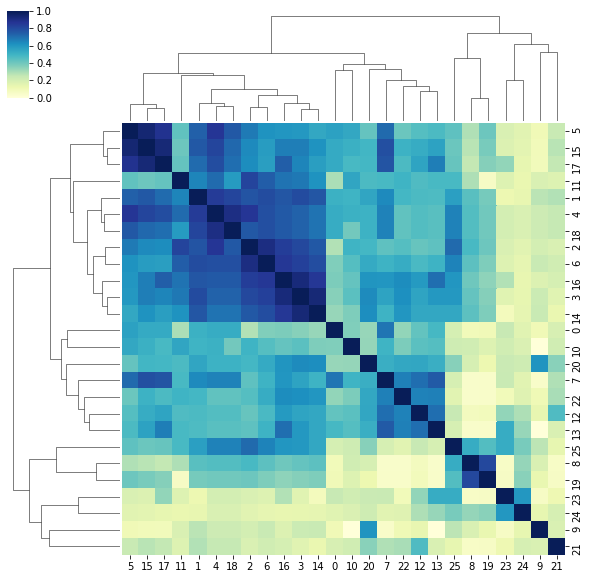

In [5]:
import numpy as np; import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# perform a cosine similarity on the letters using the vector of each letter's pixels
df = pd.DataFrame(trainingDataList)
df2 = df[1].apply(pd.Series)
cs = cosine_similarity(df2)
cm = sns.clustermap(cs,cmap="YlGnBu")
cm.savefig('cm.png',dpi=100)